Testing Playground

In [55]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pickle
import numpy as np
import random
from matplotlib import pyplot as plt
from universal_portfolio import universal_portfolio
from ftl import ftl
from ftrl import ftrl
from ogd import ogd
from ll import ll
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
# intialization
dict = pickle.load(open('../data/stock_data.pickle', 'rb'))

# run the simulation for n number of random stock tickers, chosen
# from dict
def run_simulation(stock_tickers, t=None):
    n = len(stock_tickers)
    assert n <= len(dict.keys())
    # GOOGL has the most weeks of stock data, some stocks may have less weeks
    # worth of data, so we try to avoid going over since we account for this 
    # by padding the data with extraneous 1 vectors
    if t == None or t > len(dict['GOOGL']['price']):
        t = len(dict['GOOGL']['price'])
    time_start = time.time()
    # stock_tickers = [dict.keys()[i] for i in indices]
    data = []
    prev_price = [dict[i]['price'][0] for i in stock_tickers]
    for j in range(t):
        curr_time_step = []
        for i in range(n):
            stock = stock_tickers[i]
            if j >= len(dict[stock]['price']):
                curr_time_step.append(1)
                continue
            curr_time_step.append(dict[stock]['price'][j] / prev_price[i])
            prev_price[i] = dict[stock]['price'][j]
        data.append(curr_time_step)
    data = np.array(data)
    print('done gathering data\n')

    # instantiate the various strategies
    last_leader = ll(n)
    ll_performance = last_leader.ingest(data)
    print('done ingesting for ll, time took:', (time.time() - time_start), '\n')
    time_start = time.time()
    up = universal_portfolio(n)
    up_performance = up.ingest(data)
    print('done ingesting for up, time took:', (time.time() - time_start), '\n')
    time_start = time.time()
    follow_leader = ftl(n)
    ftl_performance = follow_leader.ingest(data)
    print('done ingesting for ftl, time took:', (time.time() - time_start), '\n')
    time_start = time.time()
    follow_regularized = ftrl(n, 7)
    ftrl_performance = follow_regularized.ingest(data)
    print('done ingesting for ftrl, time took:', (time.time() - time_start), '\n')
    time_start = time.time()
    online_gradient = ogd(n, 2**-1)
    ogd_performance = online_gradient.ingest(data)
    print('done ingesting for ogd, time took:', (time.time() - time_start), '\n')
    time_start = time.time()

    # what's the best CRP in hindsight?
    best_crp = follow_leader.find_leader()
    best_crp_loss = 0
    for x in data:
        best_crp_loss += -np.log(np.dot(best_crp, x))

    # print(str(len(up.stock_values)) + '\n')
    # print(str(len(follow_leader.stock_values)) + '\n')
    # print(str(len(follow_regularized.stock_values)) + '\n')
    # print(str(len(online_gradient.stock_values)) + '\n')

    # what's the regret?
    print('LL regret is:', last_leader.loss - best_crp_loss, '\n')
    print('UP regret is:', up.loss - best_crp_loss, '\n')
    print('FTL regret is:', follow_leader.loss - best_crp_loss, '\n')
    print('FTRL regret is:', follow_regularized.loss - best_crp_loss, '\n')
    print('OGD regret is:', online_gradient.loss - best_crp_loss, '\n')



    # graphing
    x = [i for i in range(t + 1)]
    plt.plot(x, up_performance.wealth, 'r', label='UP')
    plt.plot(x, ftl_performance.wealth, 'b', label='FTL')
    plt.plot(x, ftrl_performance.wealth, 'g', label='FTRL')
    plt.plot(x, ogd_performance.wealth, 'y', label='OGD')
    plt.plot(x, ll_performance.wealth, 'k', label='LL')
    plt.legend(loc='upper left')
    plt.title(str(n) + ' random stocks')
    plt.xlabel('Weeks')
    plt.ylabel('Wealth (starting wealth is 1)')
    plt.show()

# data = np.array([[2,0.5],[0.5,2],[2,0.5],[0.5,2],[2,0.5],[0.5,2]])

done gathering data

done ingesting for ll, time took: 0.031172990798950195 

done ingesting for up, time took: 4.819775819778442 

done ingesting for ftl, time took: 8.7289879322052 

done ingesting for ftrl, time took: 9.300964832305908 

done ingesting for ogd, time took: 0.008073091506958008 

LL regret is: -0.13892039186959493 

UP regret is: 0.11037546976132157 

FTL regret is: 0.24885441471097042 

FTRL regret is: 0.119186280668105 

OGD regret is: 0.1330335259923846 



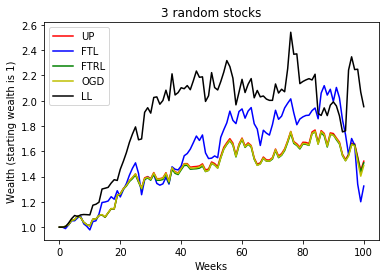

done gathering data

done ingesting for ll, time took: 0.0153961181640625 

done ingesting for up, time took: 6.491081953048706 

done ingesting for ftl, time took: 13.508722066879272 

done ingesting for ftrl, time took: 12.582149982452393 

done ingesting for ogd, time took: 0.007254123687744141 

LL regret is: 0.2818237087246691 

UP regret is: 0.16498089572765912 

FTL regret is: 0.3491237807978997 

FTRL regret is: 0.16298716477365194 

OGD regret is: 0.1808153618394598 



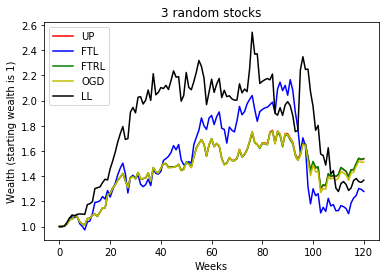

done gathering data

done ingesting for ll, time took: 0.014575004577636719 

done ingesting for up, time took: 8.422415971755981 

done ingesting for ftl, time took: 16.367460012435913 

done ingesting for ftrl, time took: 17.159343957901 

done ingesting for ogd, time took: 0.007560014724731445 

LL regret is: 0.35985251396020596 

UP regret is: 0.18059631541524185 

FTL regret is: 0.3277184058248698 

FTRL regret is: 0.16953023901963582 

OGD regret is: 0.19056868602638904 



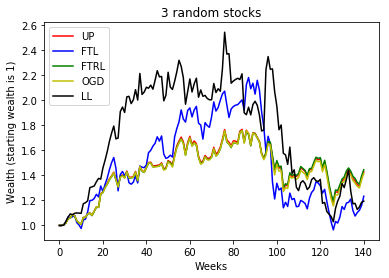

done gathering data

done ingesting for ll, time took: 0.017683982849121094 

done ingesting for up, time took: 10.816843032836914 

done ingesting for ftl, time took: 21.402508020401 

done ingesting for ftrl, time took: 22.28917908668518 

done ingesting for ogd, time took: 0.009166955947875977 

LL regret is: 0.09821545616722327 

UP regret is: 0.19185480098736396 

FTL regret is: 0.424049286105173 

FTRL regret is: 0.1844743148987552 

OGD regret is: 0.1965823757552645 



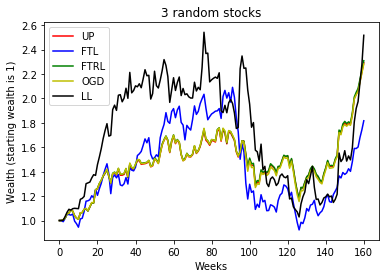

done gathering data

done ingesting for ll, time took: 0.030586957931518555 

done ingesting for up, time took: 14.637196063995361 

done ingesting for ftl, time took: 27.662840127944946 

done ingesting for ftrl, time took: 28.81516695022583 

done ingesting for ogd, time took: 0.009372949600219727 

LL regret is: 0.3064703712471777 

UP regret is: 0.3397253292406637 

FTL regret is: 0.4575175242804326 

FTRL regret is: 0.3716221477431003 

OGD regret is: 0.3523365541552961 



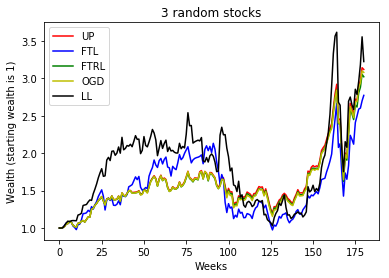

done gathering data

done ingesting for ll, time took: 0.023276805877685547 

done ingesting for up, time took: 17.380486011505127 

done ingesting for ftl, time took: 34.25306701660156 

done ingesting for ftrl, time took: 35.37619400024414 

done ingesting for ogd, time took: 0.010951042175292969 

LL regret is: 0.44821366050488143 

UP regret is: 0.6334732331299435 

FTL regret is: 0.5872400084857301 

FTRL regret is: 0.6521452136356272 

OGD regret is: 0.6356213213239641 



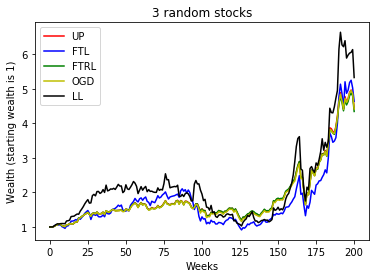

done gathering data

done ingesting for ll, time took: 0.024604082107543945 

done ingesting for up, time took: 21.126148223876953 

done ingesting for ftl, time took: 41.707072019577026 

done ingesting for ftrl, time took: 42.406769037246704 

done ingesting for ogd, time took: 0.010215997695922852 

LL regret is: 0.4009366499229641 

UP regret is: 0.7472787996983443 

FTL regret is: 0.580691692299852 

FTRL regret is: 0.7722828687871655 

OGD regret is: 0.7620278713327822 



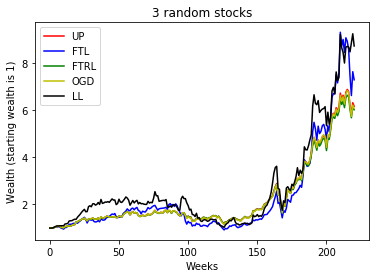

done gathering data

done ingesting for ll, time took: 0.026605844497680664 

done ingesting for up, time took: 24.911861896514893 

done ingesting for ftl, time took: 49.25682210922241 

done ingesting for ftrl, time took: 50.36281991004944 

done ingesting for ogd, time took: 0.010391950607299805 

LL regret is: 0.11975516413195164 

UP regret is: 0.6848729925410382 

FTL regret is: 0.5876749895551656 

FTRL regret is: 0.6891609225275652 

OGD regret is: 0.6661459999480233 



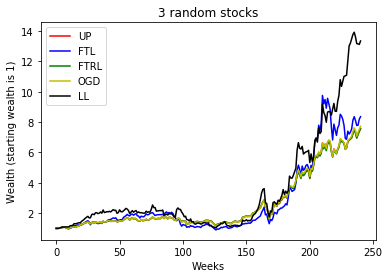

done gathering data

done ingesting for ll, time took: 0.03277397155761719 

done ingesting for up, time took: 4.6167168617248535 

done ingesting for ftl, time took: 8.686704158782959 

done ingesting for ftrl, time took: 9.239449977874756 

done ingesting for ogd, time took: 0.005329132080078125 

LL regret is: 0.3658462170700148 

UP regret is: 0.117228725407857 

FTL regret is: 0.3905159786611079 

FTRL regret is: 0.12543545105843273 

OGD regret is: 0.12765340088084504 



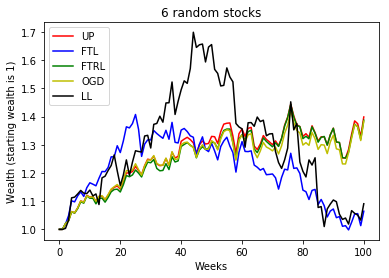

done gathering data

done ingesting for ll, time took: 0.0231020450592041 

done ingesting for up, time took: 6.579275846481323 

done ingesting for ftl, time took: 12.535406112670898 

done ingesting for ftrl, time took: 13.28563117980957 

done ingesting for ogd, time took: 0.006802082061767578 

LL regret is: 0.337142074755677 

UP regret is: 0.17804553433889142 

FTL regret is: 0.4544617637885949 

FTRL regret is: 0.1790005154368161 

OGD regret is: 0.1799562150003431 



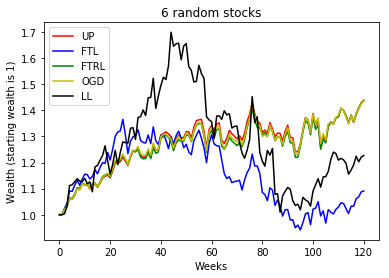

done gathering data

done ingesting for ll, time took: 0.03334784507751465 

done ingesting for up, time took: 8.860493898391724 

done ingesting for ftl, time took: 16.895498037338257 

done ingesting for ftrl, time took: 17.67689299583435 

done ingesting for ogd, time took: 0.007174968719482422 

LL regret is: 0.541212218484287 

UP regret is: 0.2175757787351561 

FTL regret is: 0.5368225224077884 

FTRL regret is: 0.2258143196460014 

OGD regret is: 0.22477121213145057 



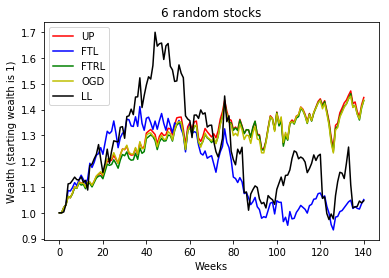

done gathering data

done ingesting for ll, time took: 0.03356814384460449 

done ingesting for up, time took: 11.259373903274536 

done ingesting for ftl, time took: 22.007906913757324 

done ingesting for ftrl, time took: 23.13658595085144 

done ingesting for ogd, time took: 0.008634090423583984 

LL regret is: 0.039415958050901034 

UP regret is: 0.28956109548504116 

FTL regret is: 0.45179174952272294 

FTRL regret is: 0.2993582005205204 

OGD regret is: 0.2757714540370497 



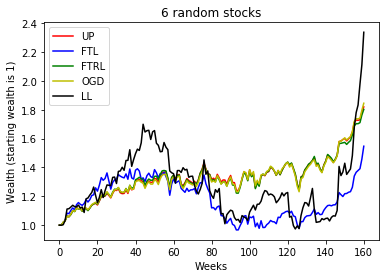

done gathering data

done ingesting for ll, time took: 0.03638482093811035 

done ingesting for up, time took: 14.107738018035889 

done ingesting for ftl, time took: 28.417913913726807 

done ingesting for ftrl, time took: 29.085946083068848 

done ingesting for ogd, time took: 0.009519100189208984 

LL regret is: 0.5100624975879152 

UP regret is: 0.3794042642093657 

FTL regret is: 0.37085585654106656 

FTRL regret is: 0.34426820301672256 

OGD regret is: 0.32509121520832707 



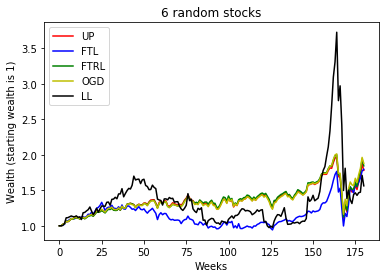

done gathering data

done ingesting for ll, time took: 0.03613996505737305 

done ingesting for up, time took: 17.201075077056885 

done ingesting for ftl, time took: 34.01293087005615 

done ingesting for ftrl, time took: 35.22477316856384 

done ingesting for ogd, time took: 0.009623050689697266 

LL regret is: 0.503330597542623 

UP regret is: 0.8057878420632053 

FTL regret is: 0.7298463884714581 

FTRL regret is: 0.7646343489181104 

OGD regret is: 0.7233406904180822 



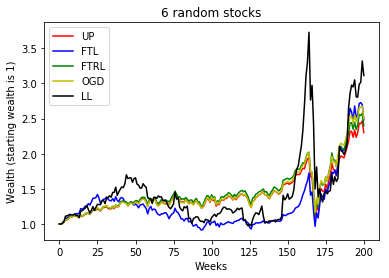

done gathering data

done ingesting for ll, time took: 0.04055905342102051 

done ingesting for up, time took: 20.776063919067383 

done ingesting for ftl, time took: 41.96556496620178 

done ingesting for ftrl, time took: 41.766822814941406 

done ingesting for ogd, time took: 0.010429859161376953 

LL regret is: 0.3460421456884939 

UP regret is: 0.5758343949354245 

FTL regret is: 0.4990875156842174 

FTRL regret is: 0.5954913515848363 

OGD regret is: 0.5373570410841952 



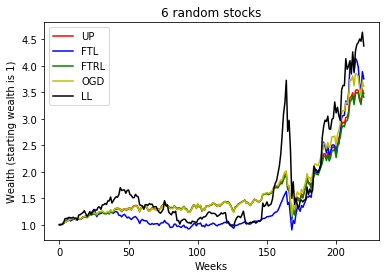

done gathering data

done ingesting for ll, time took: 0.04751706123352051 

done ingesting for up, time took: 24.056833028793335 

done ingesting for ftl, time took: 48.0657320022583 

done ingesting for ftrl, time took: 49.73365592956543 

done ingesting for ogd, time took: 0.010174989700317383 

LL regret is: 0.3373136709784159 

UP regret is: 0.7743991270173831 

FTL regret is: 0.4727287054973601 

FTRL regret is: 0.7592970277632536 

OGD regret is: 0.7317119027821395 



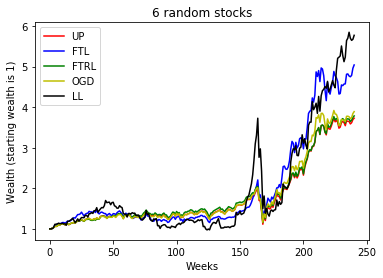

done gathering data

done ingesting for ll, time took: 0.03277301788330078 

done ingesting for up, time took: 4.515843152999878 

done ingesting for ftl, time took: 8.462906837463379 

done ingesting for ftrl, time took: 9.196623086929321 

done ingesting for ogd, time took: 0.0059850215911865234 

LL regret is: 0.441917404940699 

UP regret is: 0.10284196081862201 

FTL regret is: 0.25753995532954055 

FTRL regret is: 0.10399624874431374 

OGD regret is: 0.1257922476333026 



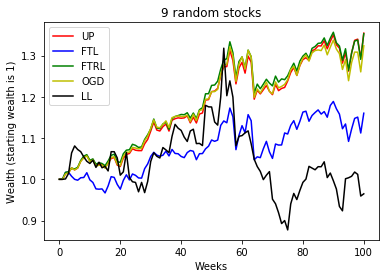

done gathering data

done ingesting for ll, time took: 0.030987977981567383 

done ingesting for up, time took: 6.354886054992676 

done ingesting for ftl, time took: 12.272776126861572 

done ingesting for ftrl, time took: 13.138978958129883 

done ingesting for ogd, time took: 0.006796121597290039 

LL regret is: 0.621937376559824 

UP regret is: 0.11967713590287493 

FTL regret is: 0.22185923354954273 

FTRL regret is: 0.14199666833001479 

OGD regret is: 0.12956789808247482 



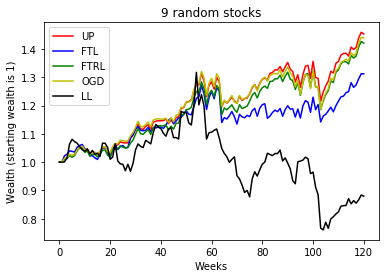

done gathering data

done ingesting for ll, time took: 0.03620004653930664 

done ingesting for up, time took: 8.533545017242432 

done ingesting for ftl, time took: 16.552540063858032 

done ingesting for ftrl, time took: 17.606566905975342 

done ingesting for ogd, time took: 0.006834983825683594 

LL regret is: 0.5293296748971841 

UP regret is: 0.15755865989569395 

FTL regret is: 0.09736496115240872 

FTRL regret is: 0.11116384878999613 

OGD regret is: 0.1580588465591788 



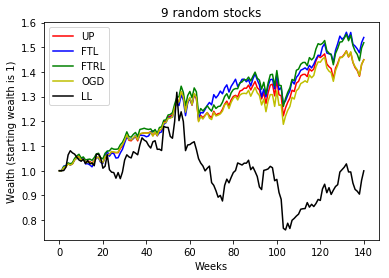

done gathering data

done ingesting for ll, time took: 0.041847944259643555 

done ingesting for up, time took: 11.111816167831421 

done ingesting for ftl, time took: 21.459823846817017 

done ingesting for ftrl, time took: 22.772895097732544 

done ingesting for ogd, time took: 0.010107040405273438 

LL regret is: 0.6205999856442034 

UP regret is: 0.19438388163615689 

FTL regret is: 0.1779706726992687 

FTRL regret is: 0.20568151715818167 

OGD regret is: 0.17691837591966908 



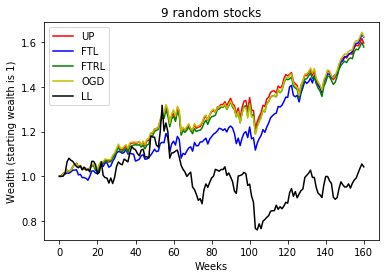

done gathering data

done ingesting for ll, time took: 0.0492558479309082 

done ingesting for up, time took: 13.90113115310669 

done ingesting for ftl, time took: 27.364008903503418 

done ingesting for ftrl, time took: 29.104812145233154 

done ingesting for ogd, time took: 0.011732101440429688 

LL regret is: 1.266773190342472 

UP regret is: 0.2949030791624434 

FTL regret is: 0.34537552671304145 

FTRL regret is: 0.28148299791001513 

OGD regret is: 0.23787010584835977 



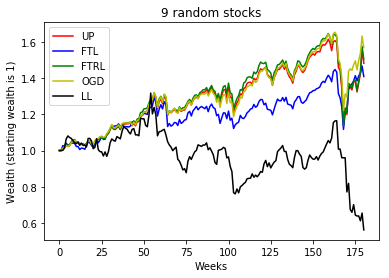

done gathering data

done ingesting for ll, time took: 0.04891395568847656 

done ingesting for up, time took: 21.37993097305298 

done ingesting for ftl, time took: 37.73611402511597 

done ingesting for ftrl, time took: 37.742547035217285 

done ingesting for ogd, time took: 0.015005826950073242 

LL regret is: 1.5542837401428564 

UP regret is: 0.3440162182605576 

FTL regret is: 0.3284217307962463 

FTRL regret is: 0.3538861694921901 

OGD regret is: 0.2775613000798628 



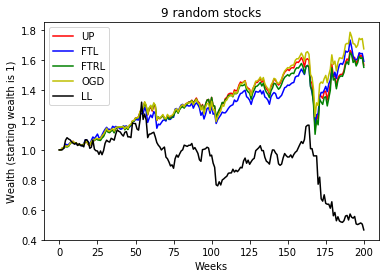

done gathering data

done ingesting for ll, time took: 0.05920815467834473 

done ingesting for up, time took: 20.803529977798462 

done ingesting for ftl, time took: 43.25490093231201 

done ingesting for ftrl, time took: 47.92397093772888 

done ingesting for ogd, time took: 0.013315916061401367 

LL regret is: 1.467620532491293 

UP regret is: 0.21655075908717614 

FTL regret is: 0.2785278323542192 

FTRL regret is: 0.20353413705252155 

OGD regret is: 0.1811360621975563 



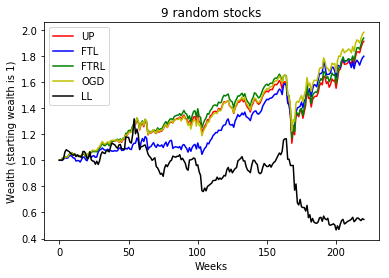

done gathering data

done ingesting for ll, time took: 0.06568002700805664 

done ingesting for up, time took: 29.380353927612305 

done ingesting for ftl, time took: 57.973438024520874 

done ingesting for ftrl, time took: 62.62088894844055 

done ingesting for ogd, time took: 0.027586936950683594 

LL regret is: 1.5080972617337745 

UP regret is: 0.2764893694038838 

FTL regret is: 0.25324955260399473 

FTRL regret is: 0.30976701580085786 

OGD regret is: 0.22453012171672082 



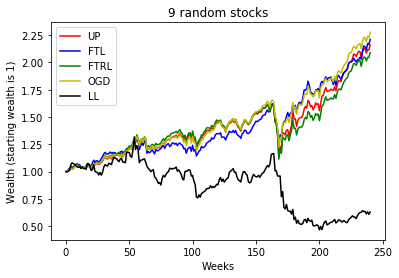

done!


In [74]:
# i is the number of random stocks to use (dimension d)
for i in range(3, 13, 3):
    stock_tickers = list(random.sample(dict.keys(), i))
    # j is the number of weeks of data to use
    for j in range(100, 250, 20):
        run_simulation(stock_tickers, j)
print('done!')

done gathering data

done ingesting for ll, time took: 0.009980201721191406 

done ingesting for up, time took: 5.713435173034668 

done ingesting for ftl, time took: 11.055411100387573 

done ingesting for ftrl, time took: 10.640532970428467 

done ingesting for ogd, time took: 0.0077860355377197266 

LL regret is: 0.0 

UP regret is: 0.0 

FTL regret is: 0.0 

FTRL regret is: 0.0 

OGD regret is: 0.0 



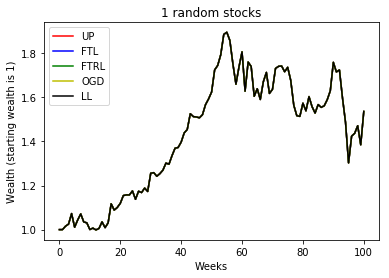

done gathering data

done ingesting for ll, time took: 0.007972002029418945 

done ingesting for up, time took: 7.290583848953247 

done ingesting for ftl, time took: 14.999400854110718 

done ingesting for ftrl, time took: 14.775044202804565 

done ingesting for ogd, time took: 0.009382009506225586 

LL regret is: 0.0 

UP regret is: 0.0 

FTL regret is: 0.0 

FTRL regret is: 0.0 

OGD regret is: 0.0 



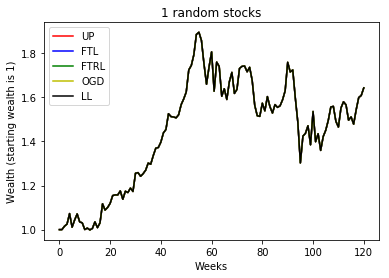

done gathering data

done ingesting for ll, time took: 0.006978034973144531 

done ingesting for up, time took: 10.809592008590698 

done ingesting for ftl, time took: 19.44822382926941 

done ingesting for ftrl, time took: 19.447239875793457 

done ingesting for ogd, time took: 0.006322145462036133 

LL regret is: 0.0 

UP regret is: 0.0 

FTL regret is: 0.0 

FTRL regret is: 0.0 

OGD regret is: 0.0 



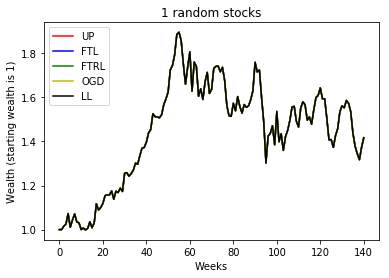

done gathering data

done ingesting for ll, time took: 0.0083770751953125 

done ingesting for up, time took: 12.35466980934143 

done ingesting for ftl, time took: 24.358256101608276 

done ingesting for ftrl, time took: 25.76660704612732 

done ingesting for ogd, time took: 0.00706791877746582 

LL regret is: 0.0 

UP regret is: 0.0 

FTL regret is: 0.0 

FTRL regret is: 0.0 

OGD regret is: 0.0 



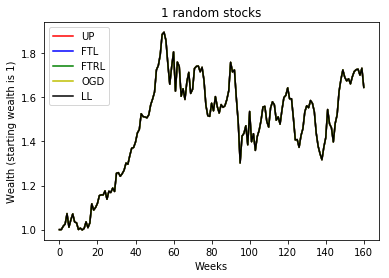

done gathering data

done ingesting for ll, time took: 0.007695913314819336 

done ingesting for up, time took: 16.29105806350708 

done ingesting for ftl, time took: 31.779678106307983 

done ingesting for ftrl, time took: 33.29034185409546 

done ingesting for ogd, time took: 0.007894039154052734 

LL regret is: 0.0 

UP regret is: 0.0 

FTL regret is: 0.0 

FTRL regret is: 0.0 

OGD regret is: 0.0 



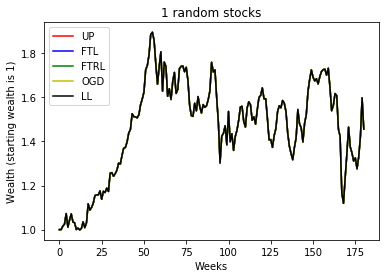

done gathering data

done ingesting for ll, time took: 0.010061025619506836 

done ingesting for up, time took: 20.261030912399292 

done ingesting for ftl, time took: 38.631803035736084 

done ingesting for ftrl, time took: 38.25326895713806 

done ingesting for ogd, time took: 0.008578062057495117 

LL regret is: 0.0 

UP regret is: 0.0 

FTL regret is: 0.0 

FTRL regret is: 0.0 

OGD regret is: 0.0 



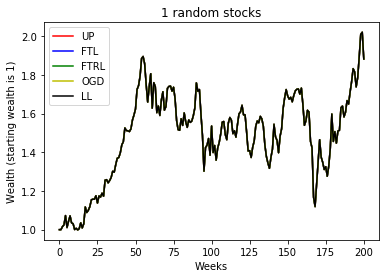

done gathering data

done ingesting for ll, time took: 0.010614156723022461 

done ingesting for up, time took: 25.767431020736694 

done ingesting for ftl, time took: 47.17335915565491 

done ingesting for ftrl, time took: 48.88681697845459 

done ingesting for ogd, time took: 0.007971048355102539 

LL regret is: 0.0 

UP regret is: 0.0 

FTL regret is: 0.0 

FTRL regret is: 0.0 

OGD regret is: 0.0 



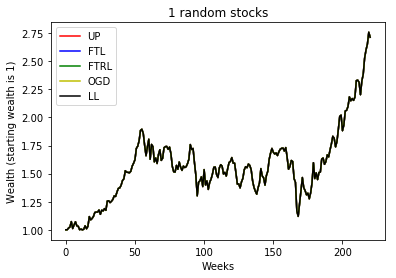

done gathering data

done ingesting for ll, time took: 0.01279592514038086 

done ingesting for up, time took: 27.77887797355652 

done ingesting for ftl, time took: 56.67193293571472 

done ingesting for ftrl, time took: 56.6680691242218 

done ingesting for ogd, time took: 0.01020193099975586 

LL regret is: 0.0 

UP regret is: 0.0 

FTL regret is: 0.0 

FTRL regret is: 0.0 

OGD regret is: 0.0 



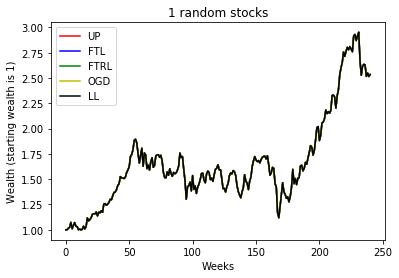

done!


In [75]:
# i is the number of random stocks to use (dimension d)
for i in range(1,2):
    stock_tickers = list(random.sample(dict.keys(), i))
    # j is the number of weeks of data to use
    for j in range(100, 250, 20):
        run_simulation(stock_tickers, j)
print('done!')